In [1]:
import json
from datetime import datetime
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [2]:
# Data describing all bike rides
BIKE_RIDES_DATASET = './data/201905_Usage_Bicimad.json'

In [3]:
with open(BIKE_RIDES_DATASET, encoding='ISO-8859-1') as dataset:
    data = [json.loads(line) for line in dataset]

In [4]:
bicimad = json_normalize(data)

In [5]:
bicimad.head(3)

,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,zip_code,_id.$oid,track.type,track.features,unplug_hourTime.$date
0,e4f17c74a759e69002023f3a76ba9f25cf1ea331de53bc...,12,1,3,311,97,4,9,28007,5ccf5dd72f3843802e9afe76,FeatureCollection,"[{'geometry': {'type': 'Point', 'coordinates':...",2019-05-01T00:00:00.000+0200
1,c7b1ba68d8bcb1668bbef4af5b2e55bfcd613c2104cd2c...,24,1,18,273,113,4,90,28026,5ccf5dd72f3843802e9afe7c,FeatureCollection,"[{'geometry': {'type': 'Point', 'coordinates':...",2019-05-01T00:00:00.000+0200
2,2c5346091af6fa3901b6c5d03d5d3ec228508cd6fdb44b...,3,1,5,286,43,0,45,,5ccf5dd72f3843802e9afe7d,FeatureCollection,"[{'geometry': {'type': 'Point', 'coordinates':...",2019-05-01T00:00:00.000+0200


In [6]:
bicimad['travel_time_mins'] = bicimad['travel_time']/60

In [7]:
bicimad['date_timestr'] = bicimad['unplug_hourTime.$date']

In [8]:
bicimad['date_time'] = bicimad.date_timestr.map(lambda x : datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000+0200'))

In [9]:
bicimad[['date_time','idunplug_station','travel_time_mins','idplug_station','user_type','ageRange']]

,date_time,idunplug_station,travel_time_mins,idplug_station,user_type,ageRange
0,2019-05-01 00:00:00,97,5.183333,9,1,4
1,2019-05-01 00:00:00,113,4.550000,90,1,4
2,2019-05-01 00:00:00,43,4.766667,45,1,0
3,2019-05-01 00:00:00,47,4.483333,129,1,4
4,2019-05-01 00:00:00,127,3.200000,83,1,0
...,...,...,...,...,...,...
415058,2019-05-31 23:00:00,64,5.500000,78,1,5
415059,2019-05-31 23:00:00,18,17.716667,82,1,0
415060,2019-05-31 23:00:00,136,65.733333,101,3,4
415061,2019-05-31 23:00:00,41,0.266667,41,3,1


In [14]:
count_byhour = bicimad.groupby(['date_time'])['travel_time_mins'].describe()

In [15]:
count_byhour[['count']]

,count
date_time,
2019-05-01 00:00:00,477.0
2019-05-01 01:00:00,347.0
2019-05-01 02:00:00,297.0
2019-05-01 03:00:00,233.0
2019-05-01 04:00:00,123.0
...,...
2019-05-31 19:00:00,1949.0
2019-05-31 20:00:00,1909.0
2019-05-31 21:00:00,1795.0


In [16]:
# weekday assign

count_byhour['dayofweek'] = count_byhour.index.dayofweek # 0 is Monday

# count_byhour = count_byhour[count_byhour.dayofweek.isin([0,1,2,3,4])]
# count_byhour[['count','dayofweek']]

,count,dayofweek
date_time,,
2019-05-01 00:00:00,477.0,2
2019-05-01 01:00:00,347.0,2
2019-05-01 02:00:00,297.0,2
2019-05-01 03:00:00,233.0,2
2019-05-01 04:00:00,123.0,2
...,...,...
2019-05-31 19:00:00,1949.0,4
2019-05-31 20:00:00,1909.0,4
2019-05-31 21:00:00,1795.0,4


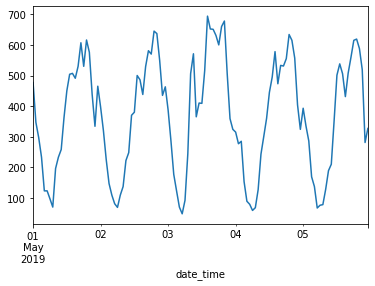

In [24]:
count_byhour.loc['2019-05-01':'2019-05-05']['count'].plot()
plt.show()

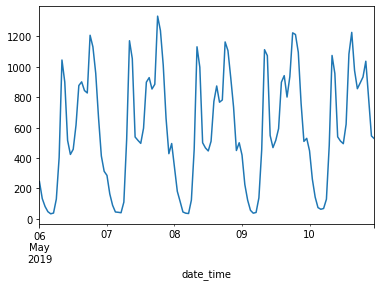

In [34]:
count_byhour.loc['2019-05-06':'2019-05-10']['count'].plot()
plt.show()

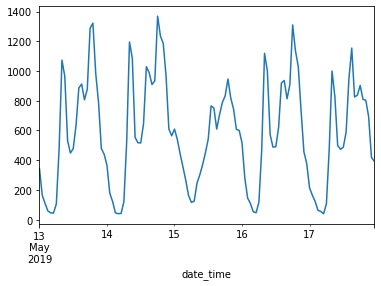

In [33]:
count_byhour.loc['2019-05-13':'2019-05-17']['count'].plot()
plt.show()

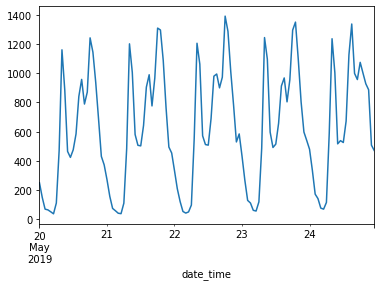

In [32]:
count_byhour.loc['2019-05-20':'2019-05-24']['count'].plot()
plt.show()

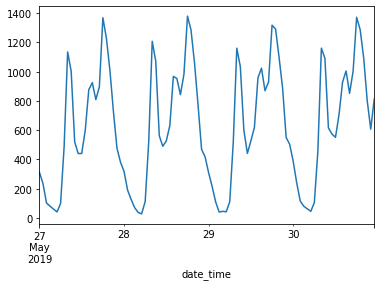

In [31]:
count_byhour.loc['2019-05-27':'2019-05-30']['count'].plot()
plt.show()